# 1.Read the file “Brexit.docx” and write a function in Python named “GetNGrams” which takes a string and a number ‘n’ as input and returns n-grams from the string.Example: String: “John met with an accident”Output: When n=2 => [(John, met), (met, with), (with, an), (an, accident)]When n=3 => [(John, met, with), (met, with, an), (with, an, accident)]When n=4 => [(John, met, with, an), (met, with, an, accident)]

In [2]:
pip install docx

  Using cached https://files.pythonhosted.org/packages/ba/90/8a24e6220cfcf6a3a0162535d5b926e774117e384ff921908e07e4c92bda/Pillow-7.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/ba/a0e6866057fc0bbd17192925c1d63a3b85cf522965de9bc02364d08e5b84/lxml-4.5.0-cp36-cp36m-manylinux1_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
import docx
doc = docx.Document("Brexit.docx")

In [3]:
def GetNGrams(sen,ng):
    from nltk import ngrams
    return ngrams(sen.split(), ng)

In [5]:
sen="John met with an accident"

In [7]:
for i in GetNGrams(sen,3):
    print(i)

('John', 'met', 'with')
('met', 'with', 'an')
('with', 'an', 'accident')


# 2.Read the file “Brexit.docx” andwrite python functions which take a string as an input and returns:•Number of Nouns (all forms of noun). Take function name as “NounsCount”•Number of Pronouns (all forms). Take function name as “PronounsCount”•Number of Adjectives (all forms).Take function name as “AdjectivesCount”•Number of Verbs (all forms).Take function name as “VerbsCount”•Number of Adverbs (all forms).Take function name as “AdverbsCount”Plot a pie chart showing the distribution of nouns, pronouns, verbs, adverbsand adjectives.

In [11]:
def NounsCount(sent):
    from nltk import word_tokenize, pos_tag
    return sum(1 for i, p in pos_tag(word_tokenize(sent)) if p.startswith('NN') or p.startswith('NNS') or p.startswith('NNP') or p.startswith('NNPS'))

def PronounCount(sent):
    from nltk import word_tokenize, pos_tag
    return sum(1 for i, p in pos_tag(word_tokenize(sent)) if p.startswith('PRP') or p.startswith('PRPS') or p.startswith('WP') or p.startswith('WPS'))

def AdjectivesCount(sent):
    from nltk import word_tokenize, pos_tag
    return sum(1 for i, p in pos_tag(word_tokenize(sent)) if p.startswith('JJ') or p.startswith('JJR') or p.startswith('JJS'))

def VerbsCount(sent):
    from nltk import word_tokenize, pos_tag
    return sum(1 for i, p in pos_tag(word_tokenize(sent)) if p.startswith('VB') or p.startswith('VBD') or p.startswith('VBG') or p.startswith('VBN'))

def AdverbsCount(sent):
    from nltk import word_tokenize, pos_tag
    return sum(1 for i, p in pos_tag(word_tokenize(sent)) if p.startswith('RB') or p.startswith('RBR'))
    

In [22]:
import nltk
completedoc = []
for para in File.paragraphs:
    completedoc.append(para.text)
completedoc = '\n'.join(text)

print("Total noun: ",NounsCount(completedoc))
print("Total pronoun: ",PronounCount(completedoc))
print("Total adjective: ",AdjectivesCount(completedoc))
print("Total verb: ",VerbsCount(completedoc))
print("Total adverb: ",AdverbsCount(completedoc))


Total noun:  33502
Total pronoun:  104
Total adjective:  5006
Total verb:  6848
Total adverb:  83


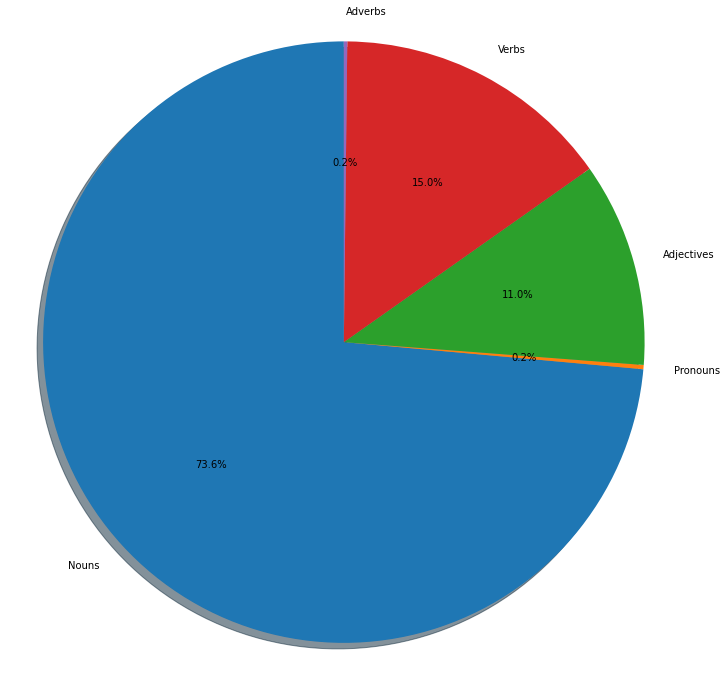

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,12])
li= [NounsCount(completedoc),PronounCount(completedoc),AdjectivesCount(completedoc),VerbsCount(completedoc),AdverbsCount(completedoc)]
suml = sum(li)
labels = ['Nouns', 'Pronouns', 'Adjectives', 'Verbs', 'Adverbs']
slots = [(li[0]/suml)*100, (li[1]/suml)*100, (li[2]/suml)*100, (li[3]/suml)*100, (li[4]/suml)*100]
plt.pie(slots, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') 

plt.show()

# 3.Read the file “Brexit.docx” andwrite pythonfunctions which take a string as an input and returns:•Number of geo-Political entities present in the file.Take function name as“GeoPoliticalCount”•Number of Personspresent in the file. Take function name as “PersonsCount”•Numbers of Organizations mentioned in the file.Take function name as “OrganizationsCoun

In [28]:
def GeoPoliticalCount(text):
    import nltk
    g=0
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label()=="GPE":
                    g+=1
    return g

def PersonsCount(text):
    import nltk
    p=0
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label()=="PERSON":
                    p+=1
    return p

def OrganizationsCount(text):
    import nltk
    o=0
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label()=="ORGANIZATION":
                    o+=1
    return o

print("Geo Political Entities: ",GeoPoliticalCount(completedoc))
print("Person Count: ",PersonsCount(completedoc))
print("Organization Count: ",OrganizationsCount(completedoc))

Geo Political Entities:  9
Person Count:  14
Organization Count:  2


# 4. Answer the following questions:•Most frequent bi-gram from the data•Most frequent Noun•Most frequent GeoPolitical Entity•Most frequent person

In [30]:

import re
import nltk
import docx
import string
from nltk import ne_chunk
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize


def getNouns(text):
    is_noun = lambda pos: pos == 'NN' or pos == 'NNS' or pos == 'NNP' or pos == 'NNPS'
    return [word for (word,pos) in nltk.pos_tag(word_tokenize(text)) if is_noun(pos)]

def GetNGrams(text, n=2):
    nop_text = [ch for ch in text if ch not in string.punctuation]
    return list(ngrams(word_tokenize(''.join(nop_text)), n = n))

def getNERtext(text):
    ner_text = str(ne_chunk(nltk.pos_tag(word_tokenize(text))))
    return ner_text

doc = docx.Document('Brexit.docx')

full_text = ""
for i in range(len(doc.paragraphs)):
    full_text += doc.paragraphs[i].text
    full_text += "\n"    

ner_text = getNERtext(full_text)

noun_counts = Counter(getNouns(full_text))
mc_nouns = sorted(noun_counts.items(), key= lambda kv:(kv[1], kv[0]), reverse= True)[0][0]

bigram_counts = Counter(GetNGrams(full_text))
mc_bigram = sorted(bigram_counts.items(), key= lambda kv:(kv[1], kv[0]), reverse= True)[0][0]

gpe_counts = Counter(re.findall(r'\(GPE .*/', ner_text))
mc_gpe = sorted(gpe_counts.items(), key= lambda kv:(kv[1], kv[0]), reverse= True)[0][0][5:-1]

person_counts = Counter(re.findall(r'\(PERSON .*/', ner_text))
mc_per = sorted(person_counts.items(), key= lambda kv:(kv[1], kv[0]), reverse= True)[0][0][8:-1]

print("\nMost common Noun: {}\nMost Common Bigram: {}\nMost Common GPE: {}\
    \nMost common Person: {}\n".format(mc_nouns, mc_bigram, mc_gpe, mc_per))


Most common Noun: ’
Most Common Bigram: ('of', 'the')
Most Common GPE: Britain    
Most common Person: Brexit

